<a href="https://colab.research.google.com/github/syedabusafwan/ML-practice/blob/main/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
# prompt: import dog vs cat

!pip install -q kaggle
import zipfile
import os

# Upload your kaggle.json file (API key)
from google.colab import files
files.upload()

# Create the .kaggle directory and move the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset (replace with the actual dataset name)
!kaggle datasets download -d biaiscience/dogs-vs-cats

# Extract the downloaded dataset
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('dogs-vs-cats')

# Example: Check the contents of the extracted directory
!ls dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
100% 814M/817M [00:07<00:00, 114MB/s]
100% 817M/817M [00:07<00:00, 122MB/s]
test  train


In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [6]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [10]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 177ms/step - accuracy: 0.9824 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 6.4977e-06
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 169ms/step - accuracy: 1.0000 - loss: 5.0327e-06 - val_accuracy: 1.0000 - val_loss: 3.0659e-06
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 167ms/step - accuracy: 1.0000 - loss: 2.5632e-06 - val_accuracy: 1.0000 - val_loss: 2.0133e-06
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 166ms/step - accuracy: 1.0000 - loss: 1.7227e-06 - val_accuracy: 1.0000 - val_loss: 1.5026e-06
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 166ms/step - accuracy: 1.0000 - loss: 1.3075e-06 - val_accuracy: 1.0000 - val_loss: 1.2009e-06
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 165ms/step - accuracy: 1.0000 - loss: 1.0440e-06 - val_accuracy: 1.0000 - val_loss: 1.0021e-06
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 1.0000 - loss: 8.7581e-07 - val_accuracy: 1.0000 - val_loss: 8.6091e-07
Epoch 8/10
782/782 ━━━━━

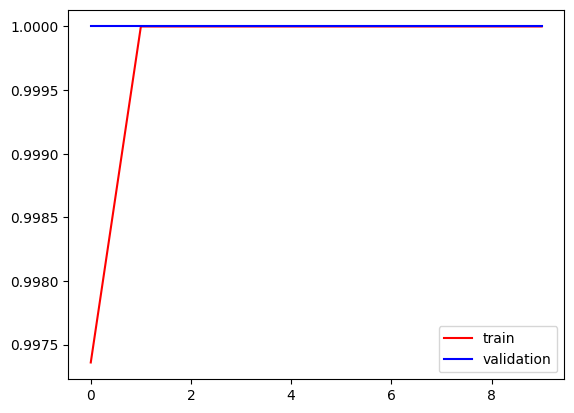

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

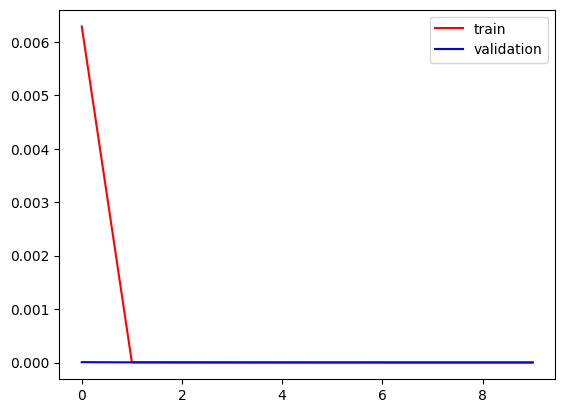

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
final_val_acc = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")

Final Validation Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: Cat


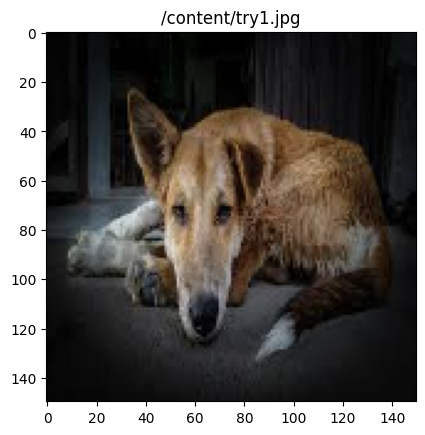

In [21]:
# prompt: predict any images

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Assuming 'model' is your trained model from the previous code
# and you have an image file named 'image.jpg' in the /content directory.

image_path = '/content/try1.jpg'  # Replace with the actual path to your image file


img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")

# Display the image using plt.imshow
plt.imshow(img) # Use plt.imshow to display the image
plt.title(image_path)  # Add a title (optional)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Prediction: Cat


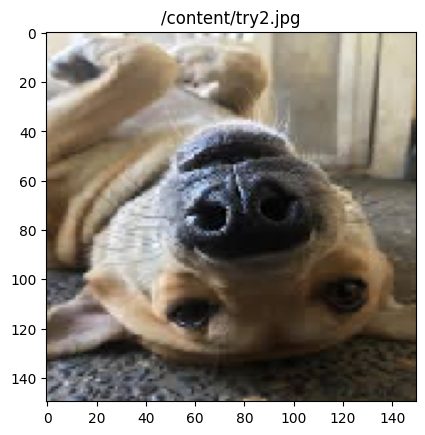

In [22]:
# prompt: predict any images

import numpy as np
from PIL import Image

# Assuming 'model' is your trained model from the previous code
# and you have an image file named 'image.jpg' in the /content directory.

image_path = '/content/try2.jpg'  # Replace with the actual path to your image file


img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")
plt.imshow(img) # Use plt.imshow to display the image
plt.title(image_path)  # Add a title (optional)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction: Cat


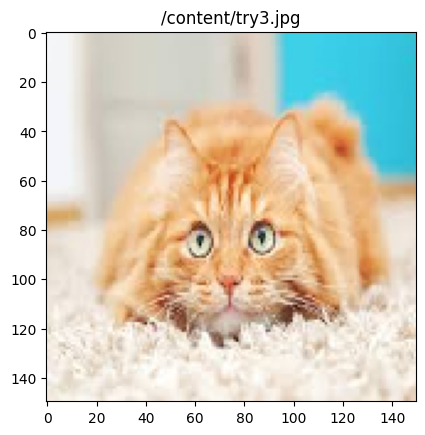

In [23]:
# prompt: predict any images

import numpy as np
from PIL import Image

# Assuming 'model' is your trained model from the previous code
# and you have an image file named 'image.jpg' in the /content directory.

image_path = '/content/try3.jpg'  # Replace with the actual path to your image file


img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")
plt.imshow(img) # Use plt.imshow to display the image
plt.title(image_path)  # Add a title (optional)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Cat


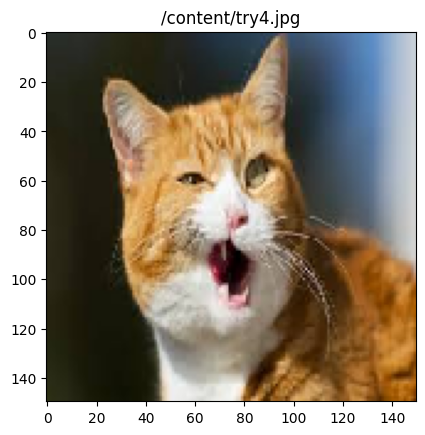

In [24]:
# prompt: predict any images

import numpy as np
from PIL import Image

# Assuming 'model' is your trained model from the previous code
# and you have an image file named 'image.jpg' in the /content directory.

image_path = '/content/try4.jpg'  # Replace with the actual path to your image file


img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")
plt.imshow(img) # Use plt.imshow to display the image
plt.title(image_path)  # Add a title (optional)
plt.show()